# Trabajo Práctico 6
Desarrollar un aplicativo que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante 3x3. El mismo incluirá las siguientes funciones:
- Erosión (tomar el mínimo valor de luminancia de la vecindad).
- Dilatación (máximo)
- Apertura, cierre, borde morfológico
- Mediana 
- Top-hat

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

Genero una función que transforma la imagen desde el espacio RGB al YIQ.

In [2]:
def rgb_to_yiq (rgb):
    yiq = np.zeros(rgb.shape)
    yiq[:,:,0] = 0.299*rgb[:,:,0] + 0.587*rgb[:,:,1] + 0.114*rgb[:,:,2]
    yiq[:,:,1] = 0.595716*rgb[:,:,0] - 0.274453*rgb[:,:,1] - 0.321263*rgb[:,:,2]
    yiq[:,:,2] = 0.211456*rgb[:,:,0] - 0.522591*rgb[:,:,1] + 0.311135*rgb[:,:,2]
    #yiq[:,:,3] = rgb[:,:,3]
    return yiq[:,:,0]

Genero una función que crea un kernel y aplica el efecto de erosión sobre la imagen en YIQ.

In [3]:
def erosion (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de erosión de la imagen
    img_eros=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmax(img[x:x+he,y:y+we]*elm[:,:])
            img_eros[x,y]=n
    return img_eros

Genero una función que crea un kernel y aplica el efecto de dilatación sobre la imagen en YIQ.

In [4]:
def dilatacion (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de dilatación de la imagen
    img_dil=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmin(img[x:x+he,y:y+we]*elm[:,:])
            img_dil[x,y]=n
    return img_dil

Genero una función que crea un kernel y aplica el efecto de mediana sobre la imagen en YIQ.

In [5]:
def mediana (yiq):
    elm=np.ones((3,3)) #creación del elemento estructurante
    he,we=elm.shape
    
    apoyoX=(he-1)//2 #defino el punto de apoyo del elemento estructurante
    apoyoY=(we-1)//2
    
    img = np.pad(yiq[:,:],[(apoyoX,apoyoX),(apoyoY,apoyoY)],'edge') #redefino los bordes según el tamaño del estructurante
        
    h,w=yiq[:,:].shape #procedimiento de mediana de la imagen
    img_med=np.zeros(yiq[:,:].shape)
    for x in range (h):
        for y in range (w):
            n=np.nanmedian(img[x:x+he,y:y+we]*elm[:,:])
            img_med[x,y]=n
    return img_med

# Bloque Principal
Leo la imagen original en RGB, la normalizo y luego se transforma al espacio YIQ.

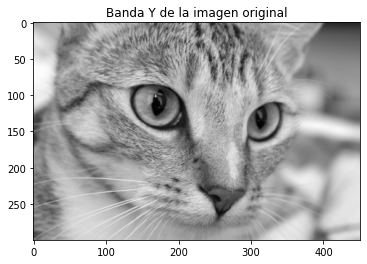

In [6]:
img=imageio.imread('imageio:chelsea.png')/255
img2=rgb_to_yiq(img)
plt.figure(1)
plt.title('Banda Y de la imagen original')
plt.imshow(img2,'gray')

Dilatación de la banda Y de la imagen original.

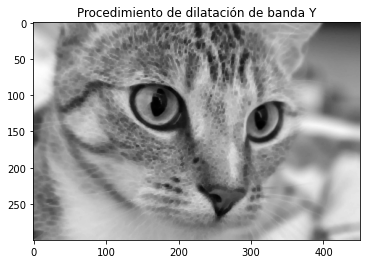

In [7]:
img3=dilatacion(img2)
plt.figure(2)
plt.title('Procedimiento de dilatación de banda Y')
plt.imshow(img3,'gray')

Erosión de la banda Y de la imagen original.

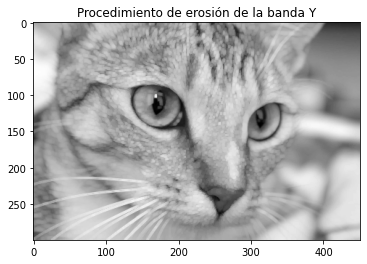

In [8]:
img4=erosion(img2)
plt.figure(3)
plt.title('Procedimiento de erosión de la banda Y')
plt.imshow(img4,'gray')

Apertura de la banda Y.

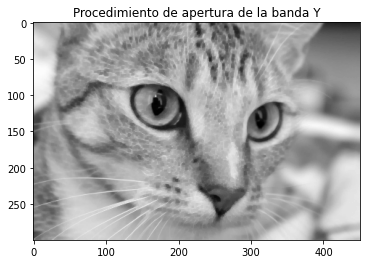

In [9]:
img5=dilatacion(img4)
plt.figure(4)
plt.title('Procedimiento de apertura de la banda Y')
plt.imshow(img5,'gray')

Cierre de la banda Y.

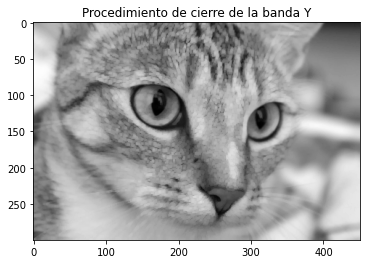

In [10]:
img6=erosion(img3)
plt.figure(5)
plt.title('Procedimiento de cierre de la banda Y')
plt.imshow(img6,'gray')

Borde morfológico exterior de la banda Y.

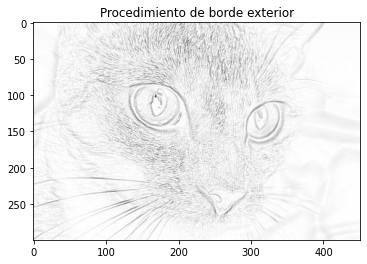

In [11]:
img7=img3-img2
plt.figure(6)
plt.title('Procedimiento de borde exterior')
plt.imshow(img7,'gray')

Borde morfológico interior de la banda Y.

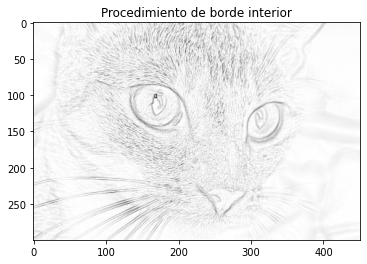

In [12]:
img8=img2-img4
plt.figure(7)
plt.title('Procedimiento de borde interior')
plt.imshow(img8,'gray')

Filtro de mediana de la banda Y.

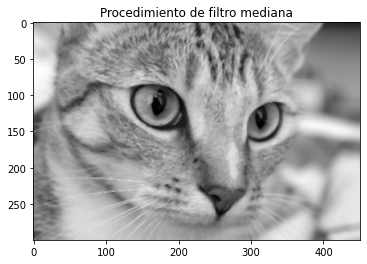

In [13]:
img9=mediana(img2)
plt.figure(8)
plt.title('Procedimiento de filtro mediana')
plt.imshow(img9,'gray')

Top hat de la banda Y.

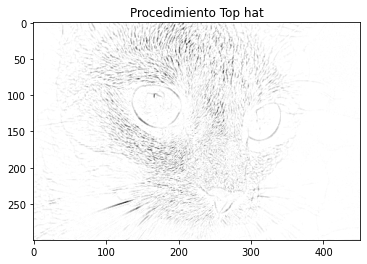

In [14]:
img10=img2-img5
plt.figure(9)
plt.title('Procedimiento Top hat')
plt.imshow(img10,'gray')